# House Sales in King County

### Importing all libraries, read data and clean data.

In [71]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import matplotlib.ticker as mticker

sns.set_style("whitegrid")
%matplotlib inline


In [4]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Hypothesis

### 1. **Waterfront Effect**: Is there a significant price difference between waterfront and non-waterfront houses? 

In [ ]:
waterfront_properties = df[df["waterfront"] == 1]
non_waterfront_properties = df[df["waterfront"] == 0]

total_waterfront = len(waterfront_properties)
total_non_waterfront = len(non_waterfront_properties)

print(f"Total Waterfront Properties: {total_waterfront}")
print(f"Total Non-Waterfront properties: {total_non_waterfront}")


Total Waterfront Properties: 163
Total Non-Waterfront properties: 21450


In [ ]:
waterfront_properties_mean_price = waterfront_properties["price"].mean()
non_waterfront_properties_mean_price = non_waterfront_properties["price"].mean()

print(f"Average Price of Waterfront Properties: {waterfront_properties_mean_price}")
print(f"Average Price of Non-Waterfront Properties: {non_waterfront_properties_mean_price}")

Average Price of Waterfront Properties: 1661876.0245398772
Average Price of Non-Waterfront Properties: 531563.5998135199


- From this we can see that water front houses have more than 3 times higher average price. 

In [51]:
def calculate_avg_metrics_by_bedrooms(properties, label):
    avg_metrics = properties.groupby("bedrooms")[["price", "sqft_lot", "sqft_living"]].mean().sort_index()
    return avg_metrics

pd.options.display.float_format = '{:,.2f}'.format

# Calculate averages for waterfront and non-waterfront properties
avg_metrics_water = calculate_avg_metrics_by_bedrooms(waterfront_properties, "Waterfront Properties")
avg_metrics_non_water = calculate_avg_metrics_by_bedrooms(non_waterfront_properties, "Non-Waterfront Properties")

# Create DataFrame with both property types
avg_metrics = pd.DataFrame({
    "Waterfront Price": avg_metrics_water["price"],
    "Waterfront Lot Sqft": avg_metrics_water["sqft_lot"],
    "Waterfront Living Sqft": avg_metrics_water["sqft_living"],
    "Non-Waterfront Price": avg_metrics_non_water["price"],
    "Non-Waterfront Lot Sqft": avg_metrics_non_water["sqft_lot"],
    "Non-Waterfront Living Sqft": avg_metrics_non_water["sqft_living"]
}).fillna(0)

# Filter rows where both "Waterfront" and "Non-Waterfront" have non-zero values
avg_metrics_filtered = avg_metrics[
    (avg_metrics["Waterfront Price"] > 0) & (avg_metrics["Non-Waterfront Price"] > 0)
]

# Print results
print("Filtered Comparison of Average Prices, Lot Sizes, and Living Spaces by Bedrooms:")
print(avg_metrics)
print(avg_metrics_filtered)


Filtered Comparison of Average Prices, Lot Sizes, and Living Spaces by Bedrooms:
          Waterfront Price  Waterfront Lot Sqft  Waterfront Living Sqft  \
bedrooms                                                                  
0                     0.00                 0.00                    0.00   
1               622,680.00            17,323.80                1,070.00   
2               918,567.48            19,462.61                1,997.35   
3             1,526,424.22            34,794.31                3,015.89   
4             1,928,485.00            17,055.65                3,608.12   
5             2,770,592.11            22,366.26                4,962.68   
6             2,956,250.00            27,906.75                4,602.50   
7                     0.00                 0.00                    0.00   
8                     0.00                 0.00                    0.00   
9                     0.00                 0.00                    0.00   
10                 

- Here we can see that non-water properties has some houses with more than 6 bedrooms. And from that I wanted to check is it possible that non-water properties have bigger lot. From this table is visible that waterfront  have bigger lots.

In [40]:

def calculate_avg_price_by_bedrooms(properties,label ):
    avg_price = properties.groupby("bedrooms")["price"].mean().sort_index()
    
    return avg_price

pd.options.display.float_format = '{:,.2f}'.format

avg_price_water = calculate_avg_price_by_bedrooms(waterfront_properties, "Waterfront Properties")
avg_price_non_water = calculate_avg_price_by_bedrooms(non_waterfront_properties, "Non-Waterfront Properties")

avg_prices = pd.DataFrame({
    "Waterfront": avg_price_water,
    "Non-Waterfront": avg_price_non_water}).fillna(0)

avg_prices_filtered = avg_prices[(avg_prices["Waterfront"] > 0 ) & (avg_prices["Non-Waterfront"] > 0)]

print("Filtered Comparison of Average Prices by Bedrooms:")
print(avg_prices_filtered)

Filtered Comparison of Average Prices by Bedrooms:
           Waterfront  Non-Waterfront
bedrooms                             
1          622,680.00      309,781.10
2          918,567.48      395,497.62
3        1,526,424.22      459,280.00
4        1,928,485.00      627,859.93
5        2,770,592.11      762,771.86
6        2,956,250.00      793,718.71


- Here I selected water and non-water front houses by number of rooms and average prices. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

<Figure size 1000x600 with 0 Axes>

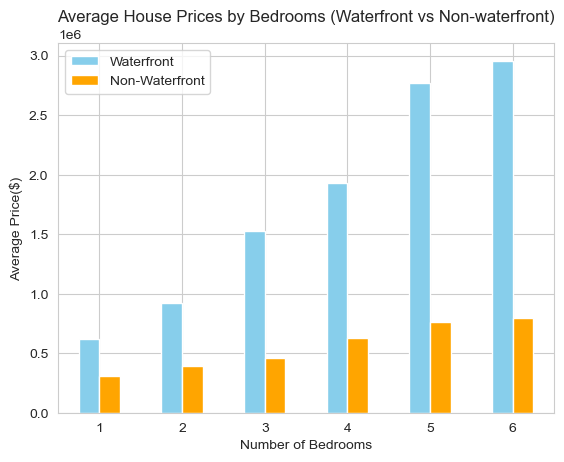

In [55]:
plt.figure(figsize=(10, 6))
avg_prices_filtered_plot = avg_prices_filtered.plot(kind="bar", color=["skyblue", "orange"])

plt.title("Average House Prices by Bedrooms (Waterfront vs Non-waterfront)")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price($)")
plt.xticks(rotation=0)



## Conclusion

There is a **significant price difference** between **waterfront and non-waterfront properties**. In addition to the premium for scenic views, **waterfront properties generally come with larger lots**, contributing to their higher prices. The added privacy—due to having no neighbors on the water-facing side—further enhances their value. Buyers are not only paying for the **view** but also for **larger land, exclusivity, and a unique living experience**.


### 2. **Build Year Influence**: Does the year a house was built impact it's price? 

Years common in both waterfront and non-waterfront data:
Index([1903, 1905, 1908, 1912, 1913, 1915, 1916, 1917, 1918, 1919, 1923, 1925,
       1926, 1928, 1930, 1931, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1943, 1945, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1965, 1966, 1967,
       1968, 1970, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1983, 1984, 1985, 1988, 1989, 1990, 1991, 1992, 1993, 1996, 1998, 1999,
       2000, 2001, 2002, 2004, 2005, 2006, 2007, 2012, 2014],
      dtype='int64', name='yr_built')


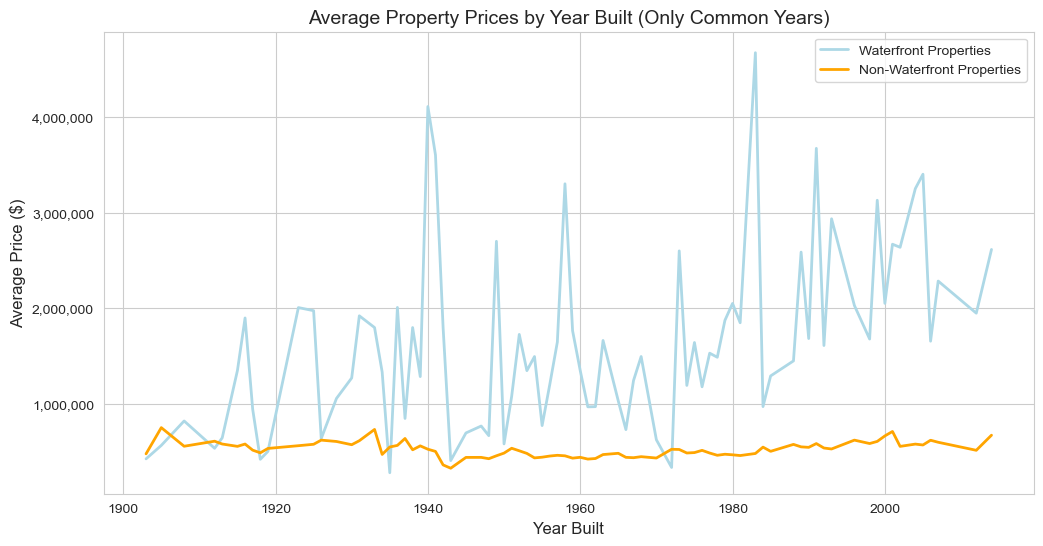

In [72]:
waterfront_properties_year_build = waterfront_properties.groupby("yr_built")["price"].mean()
non_waterfront_properties_year_build = non_waterfront_properties.groupby("yr_built")["price"].mean()

common_years = waterfront_properties_year_build.index.intersection(non_waterfront_properties_year_build.index)

waterfront_common = waterfront_properties_year_build.loc[common_years]
non_waterfront_common = non_waterfront_properties_year_build.loc[common_years]

print("Years common in both waterfront and non-waterfront data:")
print(common_years)

plt.figure(figsize=(12, 6))

plt.plot(common_years, waterfront_common.values, label="Waterfront Properties", color="lightblue", linewidth=2)
plt.plot(common_years, non_waterfront_common.values, label="Non-Waterfront Properties", color="orange", linewidth=2)

plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.title("Average Property Prices by Year Built (Only Common Years)", fontsize=14)
plt.legend()
plt.grid(True)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.show()


This graphic shows that waterfront houses maintain significantly higher and more volatile prices over time, reflecting their premium value, while non-waterfront houses have more stable and modest price trends.

## Conclusion

The graph reveals that while build year influences property prices, waterfront houses maintain significantly higher and more volatile prices over time compared to the steadier trends of non-waterfront houses, highlighting the premium value of waterfront locations.